## SC04 DDW 2D Group 1
Members & contributions:

Ooi Jia Sheng 1003424 - Video, Problem Statement, Model<br>
Hon Xue Yi 1005930 - Data, Improvement, Model evaluation<br>
Brandon Tan Rui En 1005983 - Problem Statement, Data, Model, Model evaluation, Discussion of result & improvement<br>
Joshua Wee Yong Sun 1005989 - Model, Model evaluation & Discussion of result<br>
Rachel Leow Si Min 1006071 - Model evaluation, Discussion of result & improvement<br>

Library Declarations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy,math


## 1. Problem Statement
### Background:
Food insecurity has been steadily rising since 2014. Between 2018 and 2019, the number of hungry people grew by 10 million people. Most of the increase in food security comes from Asia, where the majority of the undernourished people live. Hence, our group's target demographic is the Asian region. Our group chose to focus on Wheat since it is a staple food that is essential to many in Asia. Furthermore, Asia is the largest producer of wheat. The FAO states that one possible solution to tackling the rising food insecurity is to reduce the cost of food. Through demand and supply, when the supply of a good increases, prices should fall. Hence, our group has decided to focus on increasing the crop yield of wheat to keep prices affordable to tackle food insecurity. To increase the yield of wheat, we first have to predict the yield of wheat. The prediction of crop yield is based on soil, meteorological, environmental, macro economic and crop parameters. After building our model, we will be able to determine the predictor that affects the yield of wheat most significantly. In turn, countries in Asia will be able to better allocate their resources into that identified factor and increase the yield of wheat, in hopes of tackling food insecurity.

https://www.weforum.org/agenda/2020/07/global-hunger-rising-food-agriculture-organization-report/

### User persona: 
Our target demographic will be the undernourished and people who face food insecurity in Asia.

### Problem statement: How might we identify the largest contributing factor to a country's wheat yield, in order to prioritise allocation of resources towards that contributing factor to increase wheat output.

## 2. Data
1. **All** Datasets were sourced from FAO database: https://www.fao.org/faostat/en/#data<br>

### Data sourced are the summed total from 'Asia' region
Due to Asia being the largest producer of wheat, our group decided the `(Target)` to be the `total yield of wheat produced in Asia`. From there, we gathered data spanning from 1961 to 2020 (60 years). We then sourced for predictors for wheat yield within the 60 year timespan. Then, we create our model to find out the predictor that has the heaviest weight in predicting wheat yield.


#### Target: 
$\hat{y}$ : Wheat Yield (hg/ha)

#### Features:
$x_1$ : Land equipped for irrigation (1000ha)<br> 
$x_2$ : Total agricultural fertilizer use (kg/ha)<br>
$x_3$ : Temperature change (deg celcius)<br>
$x_4$ : Total energy use (TJ)<br>
$x_5$ : Total Crop residue burned (tonnes)<br>
$x_6$ : Total GDP ($US Mil)<br>

Our group decided on 7 features that might have a linear relationship with wheat yield. We also attempted to pick features that we deemed were independent to avoid correlation between independent variables. Hence, our features are from categories such as: Physical, Environmental and Economic. We decided that a model should have 5-7 features. Too many features and the model would be prone to overfit. Too little features and it would be underfitted. Furthermore, due to being limited to 60 rows of data, our model should not have too many features as it will decrease the accuracy of the prediction.

### Data in the  datasets:

**In "asia_wheat_yield.csv" dataset:**<br>

$\hat{y}$: Wheat Yield (hg/ha)

**In "asia_land_irrigation.csv" dataset:**

$x_1$: Land equipped for irrigation (1000ha)<br>

**In "asia_fert.csv" dataset:**

$x_2$: Total agricultural fertilizer use (kg/ha)<br>

**In 'asia_temp.csv' dataset:**

$x_3$: Temperature Change (deg celcius)<br>

**In 'asia_energy.csv' dataset:**

$x_4$: Total Energy use (TJ)<br> 

**In 'asia_burn.csv' dataset:**

$x_5$: Total Crop residue burned (tonnes)<br>

**In 'asia_gdp.csv' dataset:**

$x_6$: Total GDP ($US Mil)





    

### Steps to obtain final dataset:
1. Read and clean dataset for wheat yield (df_yield)
2. Read and clean dataset for land equipped for irrigation (df_irrigation)
3. Read and clean dataset for total fertilizer use (df_fert)
4. Read and clean dataset for temperature change (df_temp)
5. Read and clean dataset for total energy use (df_energy)
6. Read and clean dataset for crop residue burned (df_burn)
7. Read and clean dataset for total gdp (df_gdp)
8. Merge dataframes from step 1 to step 7 -> (df_merge)
9. Filter outliers to get (df_out)
10. Drop 'Area' column to get (df_final)

### 1. Read and clean Wheat yield dataset(df_yield)
Dataset link: https://www.fao.org/faostat/en/#data/QCL

In [2]:
df_yield = pd.read_csv("asia_wheat_yield.csv")
df_yield.head(3)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,142,Asia,5419,Yield,111,Wheat,1961,1961,hg/ha,7486,E,Estimated value
1,QCL,Crops and livestock products,142,Asia,5419,Yield,111,Wheat,1962,1962,hg/ha,8448,E,Estimated value
2,QCL,Crops and livestock products,142,Asia,5419,Yield,111,Wheat,1963,1963,hg/ha,8532,E,Estimated value


**From the source website, we can conclude that:**
1. **Area**: Asia
2. **Item**: Type of crop
3. **Year**: Year for data
4. **Yield (hg/ha)**: Yield of crop in hg/ha



In [3]:
#Get relevant columns
df_yield_cols = ["Area","Year","Item","Value"]
df_yield = df_yield.loc[:,df_yield_cols]
# Rename Wheat yield column
df_yield.rename(columns = {'Value':'Wheat Yield(hg/ha)'}, inplace= True)
# Drop irrelevant columns
df_yield = df_yield.drop("Item",axis =1)
print(df_yield.head(3))
print('Shape of wheat yield dataframe:',df_yield.shape)

   Area  Year  Wheat Yield(hg/ha)
0  Asia  1961                7486
1  Asia  1962                8448
2  Asia  1963                8532
Shape of wheat yield dataframe: (60, 3)


### 2. Read and clean Land equipped for irrigation (df_irrigation)
Dataset link: https://www.fao.org/faostat/en/#data/EL<br>

From the source website, we can conclude that:<br>
1. Area: Asia
2. Item: Land area equipped for irrigation
3. Unit: 1000ha<br>

Our group decided to choose this feature since we believe that countries should aim to improve their amount of irrigated land as the years go by. As more land is equipped with irrigation, there should be a higher wheat yield.



In [4]:
df_irrigation = pd.read_csv("asia_land_irrigation.csv")
df_irrigation.head(3) 

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RL,Land Use,142,Asia,5110,Area,6690,Land area equipped for irrigation,1961,1961,1000 ha,105938.0,E,Estimated value
1,RL,Land Use,142,Asia,5110,Area,6690,Land area equipped for irrigation,1962,1962,1000 ha,107236.0,E,Estimated value
2,RL,Land Use,142,Asia,5110,Area,6690,Land area equipped for irrigation,1963,1963,1000 ha,108110.0,E,Estimated value


**Clean data by dropping irrelevant columns**

In [5]:
# Get relevant columns
df_irri_cols = ["Area","Year", "Value"]
# Selecting relevant columns
df_irrigation = df_irrigation.loc[:, df_irri_cols]
df_irrigation.rename(columns = {"Value":"Land equipped for irrigation (1000ha)"}, inplace = True)
print(df_irrigation.shape)
df_irrigation.head()

(60, 3)


,Area,Year,Land equipped for irrigation (1000ha)
0,Asia,1961,105938.0
1,Asia,1962,107236.0
2,Asia,1963,108110.0
3,Asia,1964,109132.0
4,Asia,1965,109980.0


### 3. Read and clean fertilizer use dataset (df_fert)
Dataset link for fertilizer use: https://www.fao.org/faostat/en/#data/EF<br>

From the source website, we can conlude that there are 3 main types of fertilizer used:
1. Nitrogen fertilizer
2. Potassium fertilizer
3. Phosphorus fetilizer<br>
4. Note that units are in (kg/ha)

We will pivot the table and contatenate all 3 types of fertilizers to attain the total amount of fertilizer used.<br>

Our group decided that fertilizer is an important feature to have since crops usually grow better with fertilizer, hence the linear relationship.


In [6]:
df_fert = pd.read_csv("asia_fert.csv")
df_fert

,Domain,Area,Element,Item,Year,Unit,Value
0,Fertilizers indicators,Asia,Use per area of cropland,Nutrient nitrogen N (total),1961,kg/ha,4.67
1,Fertilizers indicators,Asia,Use per area of cropland,Nutrient nitrogen N (total),1962,kg/ha,5.50
2,Fertilizers indicators,Asia,Use per area of cropland,Nutrient nitrogen N (total),1963,kg/ha,6.14
3,Fertilizers indicators,Asia,Use per area of cropland,Nutrient nitrogen N (total),1964,kg/ha,7.07
4,Fertilizers indicators,Asia,Use per area of cropland,Nutrient nitrogen N (total),1965,kg/ha,8.60
...,...,...,...,...,...,...,...
175,Fertilizers indicators,Asia,Use per area of cropland,Nutrient potash K2O (total),2016,kg/ha,33.20
176,Fertilizers indicators,Asia,Use per area of cropland,Nutrient potash K2O (total),2017,kg/ha,34.62
177,Fertilizers indicators,Asia,Use per area of cropland,Nutrient potash K2O (total),2018,kg/ha,33.54
178,Fertilizers indicators,Asia,Use per area of cropland,Nutrient potash K2O (total),2019,kg/ha,31.31


**Clean fertilizer data by dropping irrelevant columns**

In [7]:
#Prep data for pivot
df_fert_cols = ["Area","Year","Item","Value"]
# Selecting relevant columns
df_fert = df_fert.loc[:,df_fert_cols]
df_fert

,Area,Year,Item,Value
0,Asia,1961,Nutrient nitrogen N (total),4.67
1,Asia,1962,Nutrient nitrogen N (total),5.50
2,Asia,1963,Nutrient nitrogen N (total),6.14
3,Asia,1964,Nutrient nitrogen N (total),7.07
4,Asia,1965,Nutrient nitrogen N (total),8.60
...,...,...,...,...
175,Asia,2016,Nutrient potash K2O (total),33.20
176,Asia,2017,Nutrient potash K2O (total),34.62
177,Asia,2018,Nutrient potash K2O (total),33.54
178,Asia,2019,Nutrient potash K2O (total),31.31


**Pivot table to show all 3 columns of fertlizer use then sum the columns together.**

In [8]:
#Pivot table
df_fert = pd.pivot_table(df_fert, values = "Value", index = ["Area","Year"], columns="Item")
# Reset y-axis and index
df_fert = df_fert.rename_axis(None, axis = 1).reset_index()
df_fert_columns = ["Area","Year",'Nutrient nitrogen N (total)','Nutrient phosphate P2O5 (total)','Nutrient potash K2O (total)']
#Selecting relevant columns
df_fert = df_fert.loc[:,df_fert_columns]
df_fert.rename(columns = {'Nutrient nitrogen N (total)':'Nitrogen Fertilizer (kg/ha)','Nutrient phosphate P2O5 (total)':'Phosphorus Fertilizer (kg/ha)','Nutrient potash K2O (total)':'Potassium Fertilizer (kg/ha)'},inplace = True)
df_fert = df_fert.fillna(0)
#sum all 3 fertilizer uses
df_fert["Total agricultural fertilizer use (kg/ha)"] = df_fert["Nitrogen Fertilizer (kg/ha)"] + df_fert['Phosphorus Fertilizer (kg/ha)'] + df_fert['Potassium Fertilizer (kg/ha)']
df_fert = df_fert.rename_axis(None, axis = 1).reset_index()
df_fert_cols = ['Area','Year','Total agricultural fertilizer use (kg/ha)']
df_fert = df_fert.loc[:,df_fert_cols]
print(df_fert.shape)
df_fert.head(3)


(60, 3)


,Area,Year,Total agricultural fertilizer use (kg/ha)
0,Asia,1961,8.45
1,Asia,1962,9.54
2,Asia,1963,10.92


### 4. Read and clean Temperature change dataset (df_temp)
Dataset link: https://www.fao.org/faostat/en/#data/ET<br>

From the source website, we can conlude that:
1. Area: Asia
2. Element: Temp change
3. Time: Year
4. Units: degree celcius

Our group decided that temperature change is a relevant feature to include since a crop's growth is affected by meterological factors such as temperature.


In [9]:
df_temp = pd.read_csv('asia_temp.csv')
df_temp.head(3)

,Domain,Area,Element,Months,Year,Unit,Value
0,Temperature change,Asia,Temperature change,Meteorological year,1961,°C,0.050
1,Temperature change,Asia,Temperature change,Meteorological year,1962,°C,-0.014
2,Temperature change,Asia,Temperature change,Meteorological year,1963,°C,0.280


In [10]:
#Get relevant columns
df_temp_cols = ['Area', 'Year', 'Value']
df_temp = df_temp.loc[:,df_temp_cols]
# Rename column
df_temp.rename(columns = {'Value':'Temperature change (deg celcius)'}, inplace= True)
print(df_temp.shape)
df_temp.head(3)

(61, 3)


,Area,Year,Temperature change (deg celcius)
0,Asia,1961,0.050
1,Asia,1962,-0.014
2,Asia,1963,0.280


### 5. Read and clean Energy use dataset (df_energy)
Dataset link: https://www.fao.org/faostat/en/#data/GN<br>

From the source website, we can conlude that:
1. Area: Asia
2. Element: Total Energy use in Agriculture
4. Units: Terajoule (TJ)

Our group decided that Energy use is a relevant feature to include since it implies increasing use of technology to farm which should increase wheat yield.


In [11]:
df_energy = pd.read_csv('asia_energy.csv')
df_energy.head(3)

,Domain,Area,Element,Item,Year,Unit,Value
0,Energy Use,Asia,Use in agriculture,Total Energy,1970,Terajoule,485553.6469
1,Energy Use,Asia,Use in agriculture,Total Energy,1971,Terajoule,505079.9259
2,Energy Use,Asia,Use in agriculture,Total Energy,1972,Terajoule,542115.0262


In [12]:
# Get relevant columns
df_energy_cols = ['Area', 'Year', 'Value']
df_energy = df_energy.loc[:,df_energy_cols]
# Rename column
df_energy.rename(columns = {'Value':'Total Energy use (TJ)'}, inplace= True)
print(df_energy.shape)
df_energy.head()

(51, 3)


,Area,Year,Total Energy use (TJ)
0,Asia,1970,485553.6469
1,Asia,1971,505079.9259
2,Asia,1972,542115.0262
3,Asia,1973,629542.4124
4,Asia,1974,669501.4165


### 6. Read and clean Crop residue burned dataset (df_burn)
Dataset link: https://www.fao.org/faostat/en/#data/GB<br>

From the source website, we can conlude that:
1. Area: Asia
2. Element: Crop residue burned (biomass)
4. Units: Tonnes

Our group decided that Crop residue burned is a relevant feature to include as when more wheat residue are burned, more new wheat can be planted. Hence, wheat yield should increase when more wheat residue is burned.


In [13]:
df_burn = pd.read_csv('asia_burn.csv')
df_burn.head(3)

,Domain,Area,Element,Item,Year,Source,Unit,Value
0,Burning - Crop Residues,Asia,Biomass burned (dry matter),Wheat,1961,FAO TIER 1,tonnes,24470778.4
1,Burning - Crop Residues,Asia,Biomass burned (dry matter),Wheat,1962,FAO TIER 1,tonnes,24478462.0
2,Burning - Crop Residues,Asia,Biomass burned (dry matter),Wheat,1963,FAO TIER 1,tonnes,24172140.4


In [14]:
# Select relevant columns
df_burn_cols = ['Area', 'Year', 'Value']
df_burn = df_burn.loc[:,df_burn_cols]
# Rename column
df_burn.rename(columns = {'Value':'Total Crop Residue Burned (tonnes)'}, inplace= True)
print(df_burn.shape)
df_burn.head(3)

(60, 3)


,Area,Year,Total Crop Residue Burned (tonnes)
0,Asia,1961,24470778.4
1,Asia,1962,24478462.0
2,Asia,1963,24172140.4


### 7. Read and clean Total GDP of Asia dataset (df_gdp)
Dataset link: https://www.fao.org/faostat/en/#data/MK<br>

From the source website, we can conlude that:
1. Area: Asia
2. Element: Total GDP of Asia
4. Units: $US Millions

Our group decided that Total GDP is a relevant feature to include as when GDP increases, there can be more investments into sectors such as agriculture, in turn increasing wheat yield.


In [15]:
df_gdp = pd.read_csv('asia_gdp.csv')
df_gdp.head(3)

,Domain,Area,Element,Item,Year,Unit,Value
0,Macro Indicators,Asia,Value US$,Gross Domestic Product,1970,millions,510164.080943
1,Macro Indicators,Asia,Value US$,Gross Domestic Product,1971,millions,560963.544836
2,Macro Indicators,Asia,Value US$,Gross Domestic Product,1972,millions,679053.093204


In [16]:
# Select relevant columns
df_gdp_cols = ['Area', 'Year', 'Value']
df_gdp = df_gdp.loc[:,df_gdp_cols]
#Rename Column
df_gdp.rename(columns = {'Value':'Total GDP ($US Mil)'}, inplace= True)
print(df_gdp.shape)
df_gdp.head(3)

(51, 3)


,Area,Year,Total GDP ($US Mil)
0,Asia,1970,510164.080943
1,Asia,1971,560963.544836
2,Asia,1972,679053.093204


### 8. Merge DataFrames from step 1 to step 7 together.

In [17]:
# Merge all dataframes together based on "Area" & "Year"
df_merge= pd.merge(df_yield, df_irrigation, on= ["Area","Year"])
df_merge = pd.merge(df_merge,df_fert, on = ["Area","Year"])
df_merge = pd.merge(df_merge,df_temp, on = ["Area","Year"])
df_merge = pd.merge(df_merge,df_energy, on = ["Area","Year"])
df_merge = pd.merge(df_merge,df_burn, on = ["Area","Year"])
df_merge = pd.merge(df_merge,df_gdp, on = ["Area","Year"])

print(df_merge.shape)
print(df_merge.head(3))
df = df_merge.copy()

(51, 9)
   Area  Year  Wheat Yield(hg/ha)  Land equipped for irrigation (1000ha)  \
0  Asia  1970               11129                               118716.0   
1  Asia  1971               12257                               120263.0   
2  Asia  1972               12962                               122048.0   

   Total agricultural fertilizer use (kg/ha)  \
0                                      25.70   
1                                      27.62   
2                                      30.81   

   Temperature change (deg celcius)  Total Energy use (TJ)  \
0                             0.074            485553.6469   
1                            -0.122            505079.9259   
2                            -0.166            542115.0262   

   Total Crop Residue Burned (tonnes)  Total GDP ($US Mil)  
0                          27579582.0        510164.080943  
1                          27987415.6        560963.544836  
2                          29254086.0        679053.093204  


### 9. Checking and removing outliers

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# Get the IQR
IQR = Q3 - Q1
print(IQR)

Year                                         2.500000e+01
Wheat Yield(hg/ha)                           8.656500e+03
Land equipped for irrigation (1000ha)        7.796330e+04
Total agricultural fertilizer use (kg/ha)    9.017500e+01
Temperature change (deg celcius)             9.555000e-01
Total Energy use (TJ)                        2.938586e+06
Total Crop Residue Burned (tonnes)           7.864449e+06
Total GDP ($US Mil)                          1.347143e+07
dtype: float64


In [19]:
#dropping any outliers outside 1.5 * IQR
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Dataset shape:',df_out.shape)


Dataset shape: (51, 9)


/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/182518511.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


#### `No outliers in data`

### Analysis of range of data

In [20]:
min_year, max_year = df_out.Year.min(), df_out.Year.max()
#Check year range of dataset
print(f'The data set spans from year {min_year} - {max_year}. It is {max_year - min_year} years worth of data.')
# Check if any null rows
print(df_out.isna().sum())
df_out.columns

The data set spans from year 1970 - 2020. It is 50 years worth of data.
Area                                         0
Year                                         0
Wheat Yield(hg/ha)                           0
Land equipped for irrigation (1000ha)        0
Total agricultural fertilizer use (kg/ha)    0
Temperature change (deg celcius)             0
Total Energy use (TJ)                        0
Total Crop Residue Burned (tonnes)           0
Total GDP ($US Mil)                          0
dtype: int64


Index(['Area', 'Year', 'Wheat Yield(hg/ha)',
       'Land equipped for irrigation (1000ha)',
       'Total agricultural fertilizer use (kg/ha)',
       'Temperature change (deg celcius)', 'Total Energy use (TJ)',
       'Total Crop Residue Burned (tonnes)', 'Total GDP ($US Mil)'],
      dtype='object')

### 10. Get final dataframe (df_final)
Drop 'Area' and 'Year' Column since they do not provide any value in prediction of wheat yield.

In [21]:
df_final_cols = df_out.columns[2:]
df_final=df_out.reindex(columns=df_final_cols)
df_final.head(3)

,Wheat Yield(hg/ha),Land equipped for irrigation (1000ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Energy use (TJ),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,118716.0,25.70,0.074,485553.6469,27579582.0,510164.080943
1,12257,120263.0,27.62,-0.122,505079.9259,27987415.6,560963.544836
2,12962,122048.0,30.81,-0.166,542115.0262,29254086.0,679053.093204


Code to export to math 2d<br>
compression_opts = dict(method='zip',
                        archive_name='out4.csv')  
df_out.to_csv('out4.zip', index=False,
          compression=compression_opts) 

# 3. Model <br>
### Correlation Matrix
We will plot a Correlation Matrix to see if there is linear correlation between the variables. When correlation coefficient is close to 1, it shows that there is strong positive correlation between the 2 variables. When correlation coefficient is close to -1, it shows that there is strong negative correlation between the 2 variables. Coefficients close to 0 means that there is no linear correlation.<br>
1. We would like to see a some linear correlation between the independent (Features) and dependent (Yield) variable.
2. We would like to see a lack of linear correlation (r<=0.9) between independent variables (a.k.a Multicollinearity) since independent variables are meant to be independent to one another. However, due to real-world factors, it is likely that 2 independent variables will have some collinearity. 
3. If 2 independent variables have (r>=0.9), we will remove 1 of the 2 independent variables to reduce multicollinearity.

Source:https://www.scribbr.com/statistics/pearson-correlation-coefficient/#:~:text=The%20Pearson%20correlation%20coefficient%20

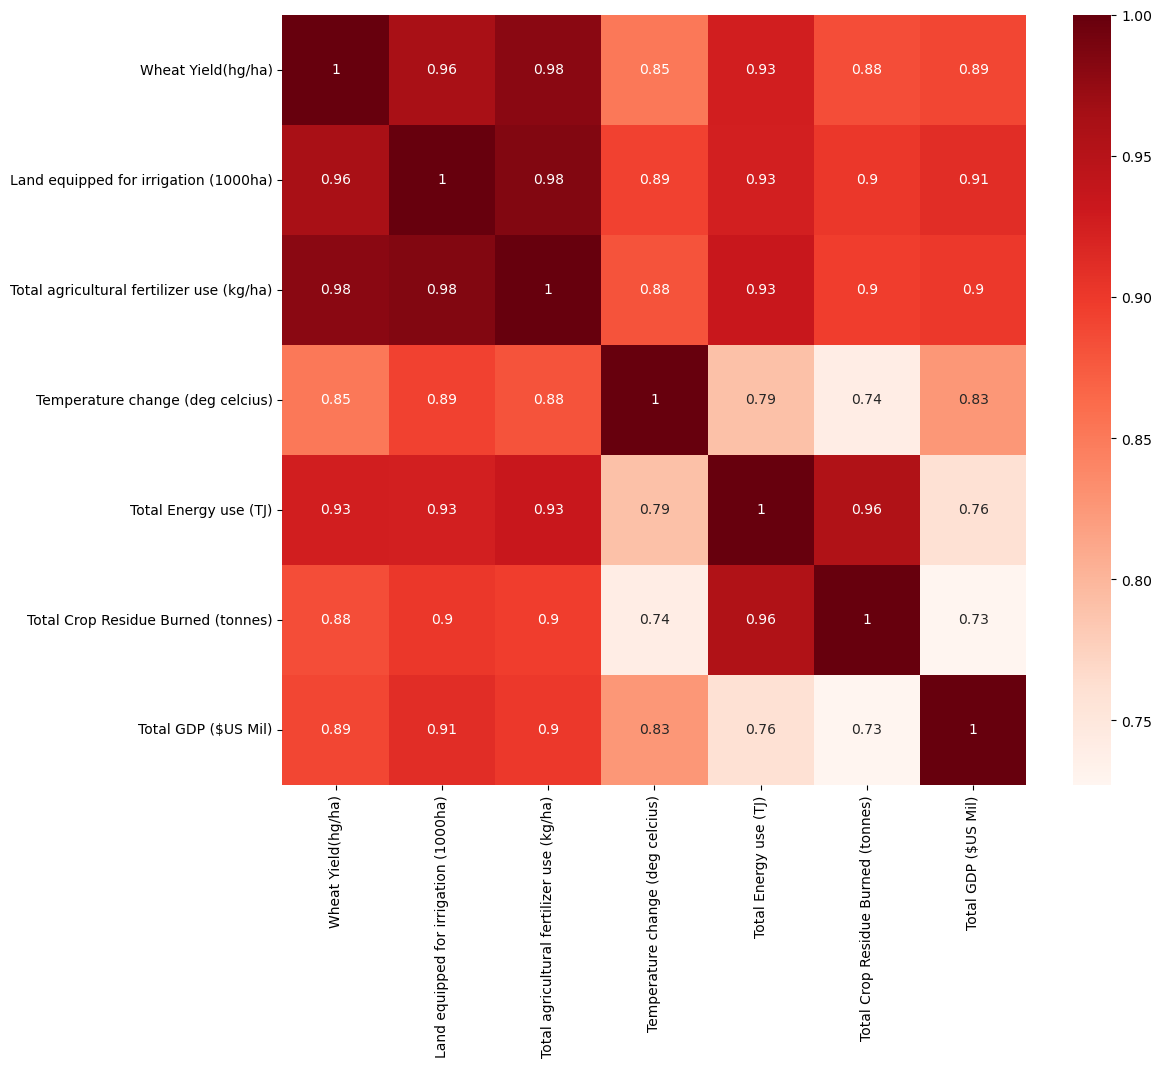

In [22]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


## Feature selection
From the Correlation Matrix, we can see that there is strong correlation between the independent and dependent variables, a good sign. We then check multicollinearity between independent variables and see if there are strong correlations between independent variables **(r >= 0.9)**. Multicollinearity doesn’t affect the model’s performance, but will affect it's interpretability. If we don’t remove the multicollinearity, we will never know how much a variable contributes to the result. <br>

1. We can see that there is strong correlation between indepenent variables `Total Crop Residue Burned` and `Total Energy Use` (r = 0.96). We will first remove `Total Energy Use` as a feature since it also has high collinearity with the other independent variables.

source: https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

### Remerge dataframes excluding Total Enegy used

In [23]:
df_merge_2= pd.merge(df_yield, df_irrigation, on= ["Area","Year"])
df_merge_2 = pd.merge(df_merge_2,df_fert, on = ["Area","Year"])
df_merge_2 = pd.merge(df_merge_2,df_temp, on = ["Area","Year"])
df_merge_2 = pd.merge(df_merge_2,df_burn, on = ["Area","Year"])
df_merge_2 = pd.merge(df_merge_2,df_gdp, on = ["Area","Year"])
# Drop Area and Year
df_final_2_cols = df_merge_2.columns[2:]
df_final_2=df_merge_2.reindex(columns=df_final_2_cols)
print(df_final_2.shape)
df_final_2.head(3)

(51, 6)


,Wheat Yield(hg/ha),Land equipped for irrigation (1000ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,118716.0,25.70,0.074,27579582.0,510164.080943
1,12257,120263.0,27.62,-0.122,27987415.6,560963.544836
2,12962,122048.0,30.81,-0.166,29254086.0,679053.093204


### Plot correlation matrix

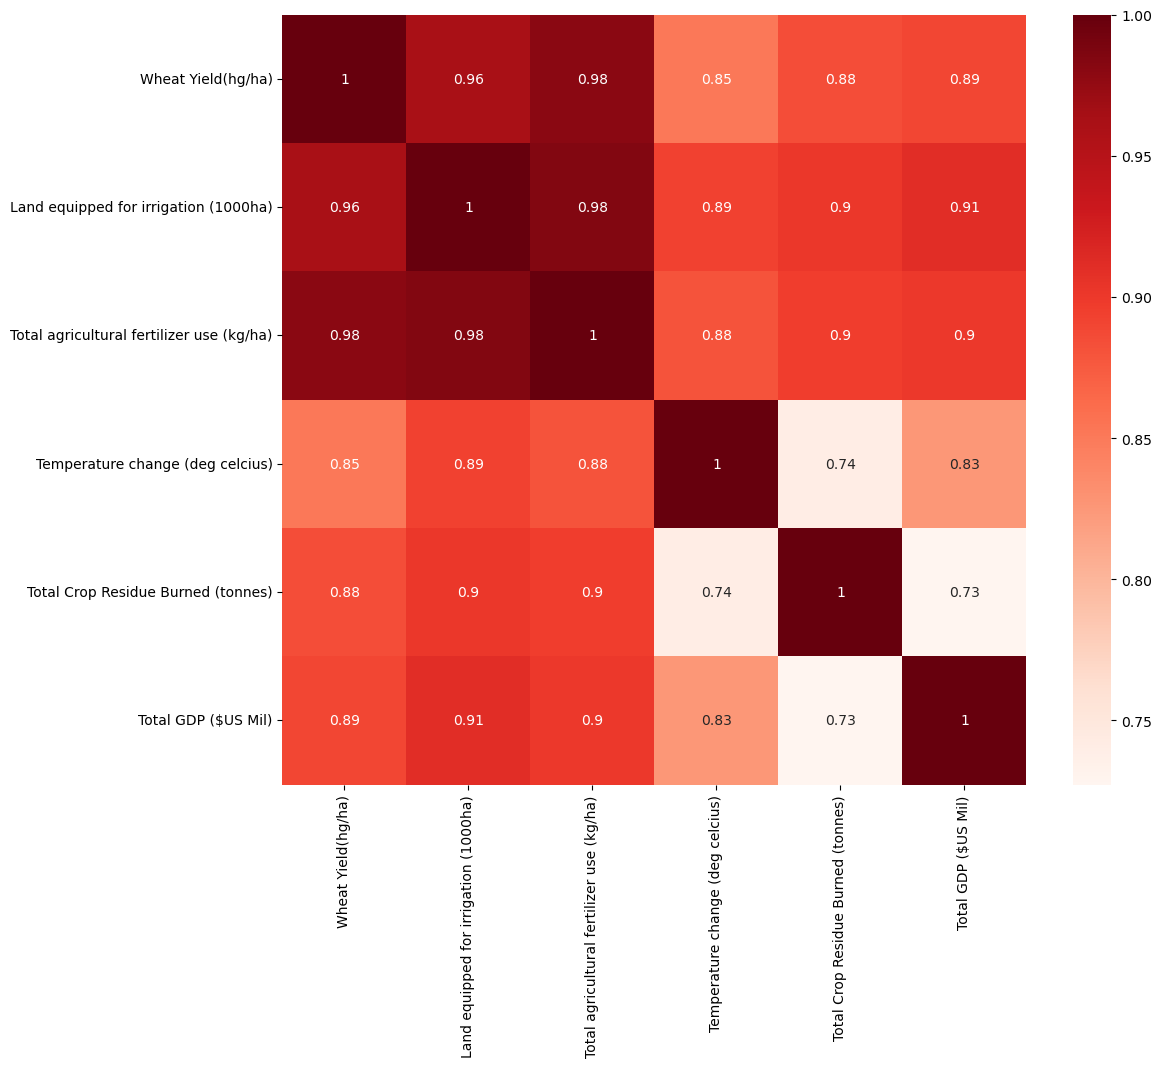

In [24]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = df_final_2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

1. There is still strong collinearity between independent variables :`Land equipped for irrigation` and `Total agricultural fertilizer used` ( r = 0.98).
2. We will now remove `Land equipped for irrigation` since it has high collinearity with the other independent variables as well.

### Re-merge dataframes excluding Land equipped for irrigation & Total Energy use

In [25]:
df_merge_3= pd.merge(df_yield, df_fert, on= ["Area","Year"])
df_merge_3 = pd.merge(df_merge_3,df_temp, on = ["Area","Year"])
df_merge_3 = pd.merge(df_merge_3,df_burn, on = ["Area","Year"])
df_merge_3 = pd.merge(df_merge_3,df_gdp, on = ["Area","Year"])
# Drop Area and year
df_final_3_cols = df_merge_3.columns[2:]
df_final_3=df_merge_3.reindex(columns=df_final_3_cols)
print(df_final_3.shape)
df_final_3.head(3)

(51, 5)


,Wheat Yield(hg/ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,25.70,0.074,27579582.0,510164.080943
1,12257,27.62,-0.122,27987415.6,560963.544836
2,12962,30.81,-0.166,29254086.0,679053.093204


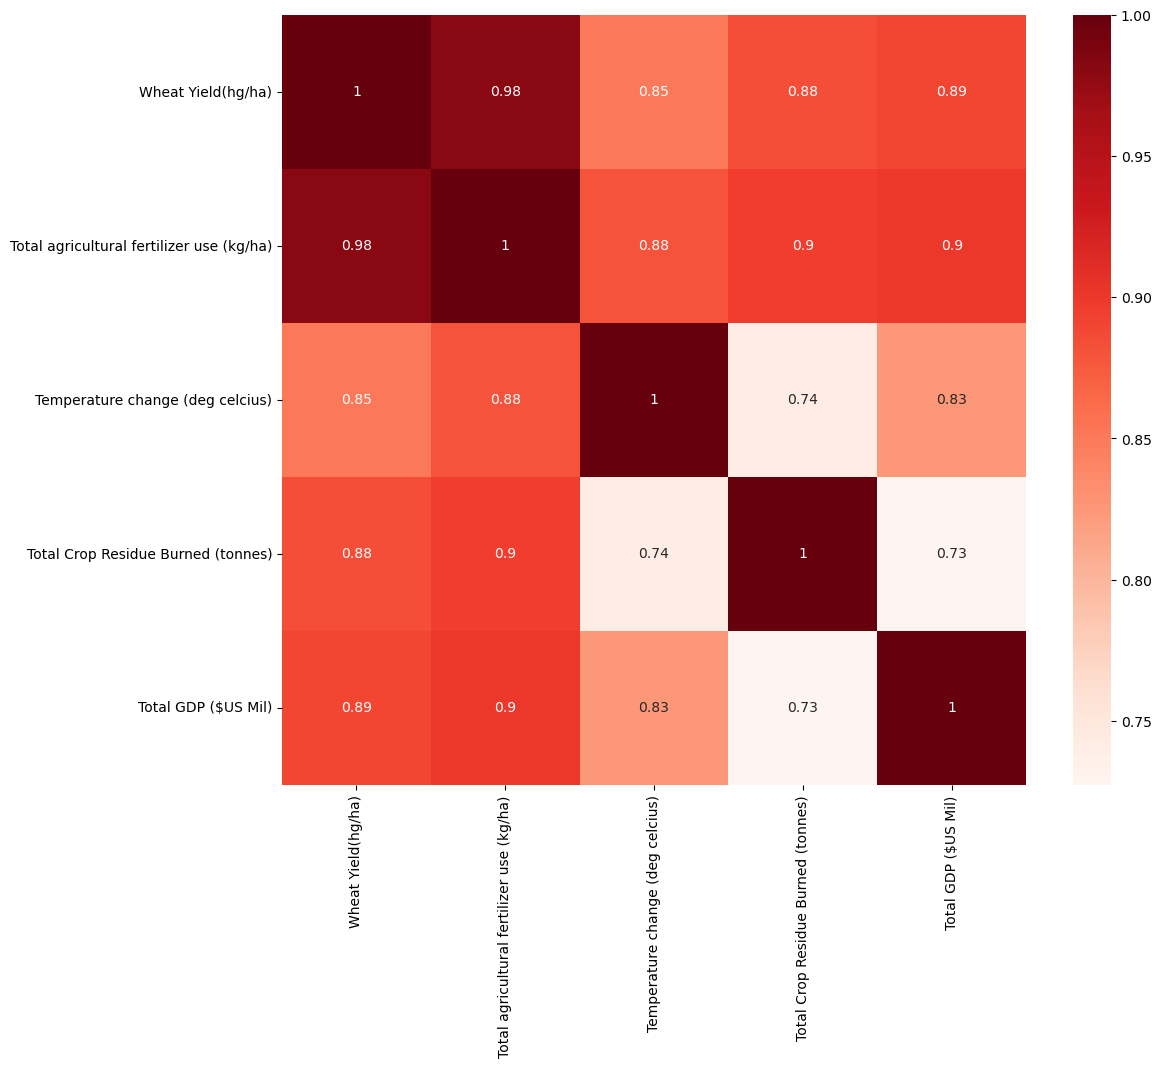

In [26]:
%matplotlib inline
plt.figure(figsize=(12,10))
cor = df_final_3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Insights on features
1. There is still strong correlation between the independent and dependent variables. (Good)
2. We have attempted to minimize the multicollinearity between independent variables. ( No r > 0.9 )
3. We are left with 4 features for the final model. With 50 datapoints, that is more than 10 datapoints per feature. Hence, it is the optimal number of features for our model.
4. We can now proceed with the fitting of the model to predict wheat yield with these 4 features.

#### Target: 
$\hat{y}$ : Wheat Yield (hg/ha)

#### Features:
$x_1$ : Total agricultural fertilizer use (kg/ha)<br>
$x_2$ : Temperature change (deg celcius)<br>
$x_3$ : Total Crop residue burned (tonnes)<br>
$x_4$ : Total GDP ($US Mil)<br>

### Final check for outliers to get (df_model)

In [27]:
# Final check for outliers
Q1 = df_final_3.quantile(0.25)
Q3 = df_final_3.quantile(0.75)
IQR = Q3 - Q1
#dropping any outliers outside 1.5 * IQR
df_model = df_final_3[~((df_final_3 < (Q1 - 1.5 * IQR)) |(df_final_3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Dataset shape:',df_model.shape)
# Check if any null rows
print('sum of null:\n',df_model.isna().sum())
df_model.columns

Dataset shape: (51, 5)
sum of null:
 Wheat Yield(hg/ha)                           0
Total agricultural fertilizer use (kg/ha)    0
Temperature change (deg celcius)             0
Total Crop Residue Burned (tonnes)           0
Total GDP ($US Mil)                          0
dtype: int64


Index(['Wheat Yield(hg/ha)', 'Total agricultural fertilizer use (kg/ha)',
       'Temperature change (deg celcius)',
       'Total Crop Residue Burned (tonnes)', 'Total GDP ($US Mil)'],
      dtype='object')

### Final dataframe that will be used in the model

In [28]:
df_model.head(3)

,Wheat Yield(hg/ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,25.70,0.074,27579582.0,510164.080943
1,12257,27.62,-0.122,27987415.6,560963.544836
2,12962,30.81,-0.166,29254086.0,679053.093204


Code to export to csv file to use for MU 2D:

compression_opts = dict(method='zip',
                        archive_name='out5.csv')  
df.to_csv('out3.zip', index=False,
          compression=compression_opts)  

## Functions to run multiple linear regression:
1. Functions can be found in week 9 cohort / homework

In [29]:
def normalize_z(df):
    df = (df - df.mean()) / df.std()
    return df


def get_features_targets(df, feature_names, target_names):
    df_target = pd.DataFrame(df.loc[:, target_names])
    df_feature = pd.DataFrame(df.loc[:, feature_names])
    return df_feature, df_target

def prepare_feature(df_feature):
    m = len(df_feature)
    n = len(df_feature.columns)
    arr = np.ones((m,1))
    df_feature = df_feature.to_numpy()
    df_feature = np.concatenate((arr, df_feature), axis = 1)
    return df_feature

def prepare_target(df_target):
    df_target = df_target.to_numpy()
    return df_target

def predict(df_feature, beta):
    if isinstance(df_feature, pd.DataFrame):
        df_feature = normalize_z(df_feature)
        df_feature = prepare_feature(df_feature)
    beta = np.reshape(beta,(-1,1))
    pred = calc_linear(df_feature, beta)
    return pred

def calc_linear(X, beta):
    return np.matmul(X, beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace = False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    
    df_feature_train = df_feature.loc[train_index,:]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    ss_res = 0
    ss_tot = 0
    y_bar = y.mean()
    for i in range(len(y)):
        ss_res += (y[i] - ypred[i])**2
        ss_tot += (y[i] - y_bar)**2
    r_2 = 1 - (ss_res / ss_tot)
    return r_2

def mean_squared_error(target, pred):
    mse = 0
    for i in range(len(target)):
        mse += (target[i] - pred[i])**2
    mse = mse / len(target)
    return mse

In [30]:
df_model.describe()
#Large variance, hence normalize features to bring all the variables to the same range

,Wheat Yield(hg/ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,23754.607843,116.172745,0.583549,3.623701e+07,1.071617e+07
std,6487.649470,53.389101,0.524591,4.412485e+06,9.913043e+06
min,11129.000000,25.700000,-0.327000,2.757958e+07,5.101641e+05
25%,19754.000000,74.190000,0.109000,3.241856e+07,2.714394e+06
50%,23924.000000,120.920000,0.527000,3.858461e+07,7.964131e+06
75%,28410.500000,164.365000,1.064500,4.028300e+07,1.618582e+07
max,34238.000000,189.300000,1.527000,4.115321e+07,3.255410e+07


### We can see that there is a large variance between datapoints, hence we will normalize the data

In [31]:
df_target = "Wheat Yield(hg/ha)"
df_cols = df_model.columns[1:]
#Get features and target
df_features, df_target = get_features_targets(df_model, df_cols, df_target)
#Normalize features
df_features = normalize_z(df_features)
df_features.describe()

,Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,2.438137e-16,2.612289e-17,-2.198677e-16,6.966105e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.694592e+00,-1.735733e+00,-1.962029e+00,-1.029553e+00
25%,-7.863542e-01,-9.046085e-01,-8.653744e-01,-8.071967e-01
50%,8.891805e-02,-1.077965e-01,5.320356e-01,-2.776179e-01
75%,9.026609e-01,9.168122e-01,9.169429e-01,5.517630e-01
max,1.369704e+00,1.798452e+00,1.114158e+00,2.202949e+00


### Scatterplot of Target vs Features before any training.

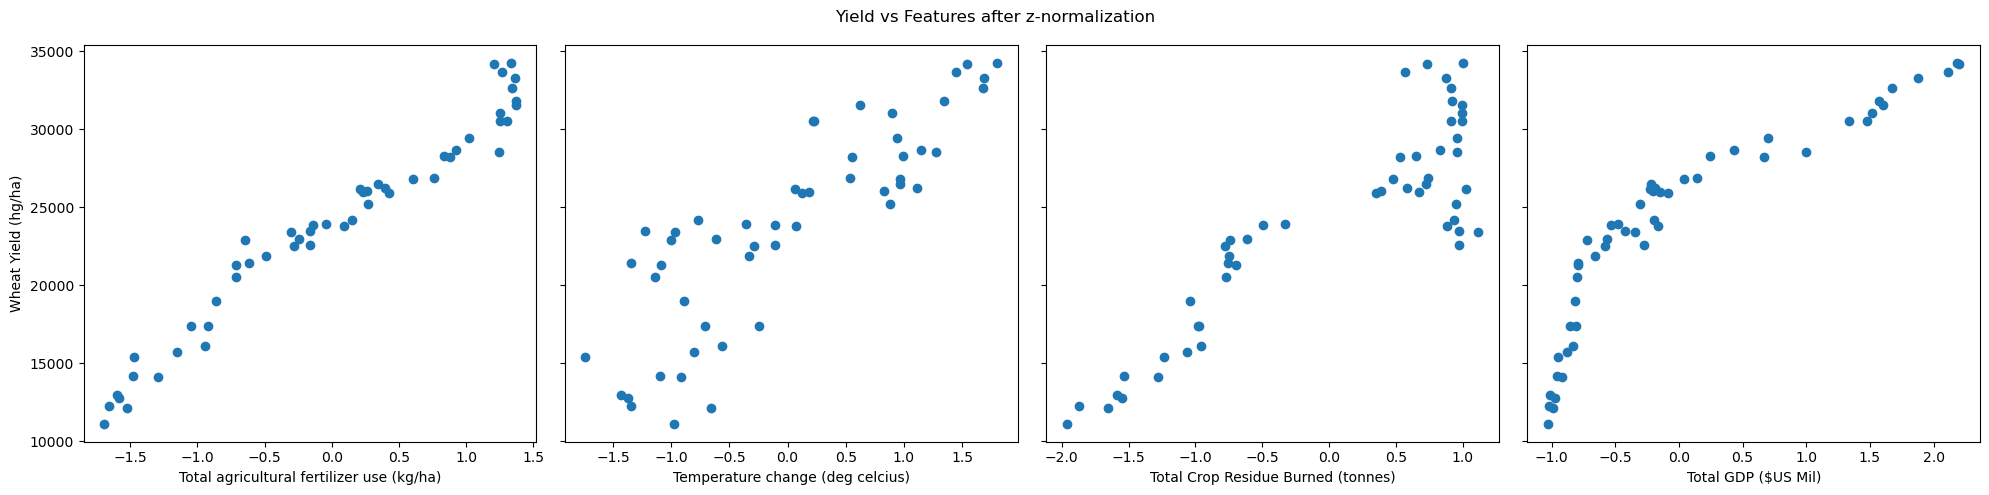

In [32]:
fig,ax=plt.subplots(1, df_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    df_feat = df_features.iloc[:,i]
    ax[i].scatter(df_feat, df_target)
    ax[i].set_xlabel(df_cols[i])
ax[0].set_ylabel("Wheat Yield (hg/ha)")
fig.suptitle("Yield vs Features after z-normalization")
fig.tight_layout()
plt.show()

1. We can observe linear relationships between the yield and features. Hence, these features are a good fit for the model.

### Split data 80:20
1. We will use more data for training since the dataset is quite limited (51 entries). Therefore, we will do a 80:20 / Train:Test split for the model. The samples will be chosen randomly to avoid bias and to give us the most accurate model as possible.

In [33]:
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, 100, 0.2)
print('Train dataset shape:',df_features_train.shape,'Test dataset shape:',df_features_test.shape)


Train dataset shape: (41, 4) Test dataset shape: (10, 4)


/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:44: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:45: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index, :]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:46: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index, :]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index, :]


### Analaysis on data splitting
1. 41 entries will be used to train the model.
2. 10 entries will be used to test the model.

### Computing Cost function


$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x) =  \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_4$$


In [34]:
def compute_cost(X, y, beta):
    J = 0
    m = len(X)
    y_i_y = np.matmul(X,beta) - y
    J =  np.matmul(y_i_y.T, y_i_y) / (2*m)
    return J

### Computing Multiple Gradient Descent
where:

$$\hat{b} =  \hat{b} - {\alpha}\frac{1}{m}X^T  \times (X \times \hat{b} - y)


In [35]:
def gradient_descent(X, y, beta, alpha, num_iters):
    J_storage = np.array([])
    m = len(X)
    n = np.shape(X)[1]
    beta = np.copy(beta)
    for i in range(num_iters):
        X_b_y = (np.matmul(X, beta) - y)
        X_T = (alpha * X.T)/m
        beta = beta - (np.matmul(X_T,X_b_y))
        cost = compute_cost(X,y,beta)
        J_storage = np.append(J_storage,cost)
    return beta, J_storage


In [36]:
# Prepare Features and Target for Multiple Gradient Descent
X = prepare_feature(df_features_train)
target = prepare_target(df_target_train)
iterations = 20000
alpha = 0.001
beta = np.zeros((X.shape[1],1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print('beta values:\n',beta)

beta values:
 [[23843.44430706]
 [ 4389.78127632]
 [  -68.92571642]
 [ 1245.32452661]
 [  973.88944555]]


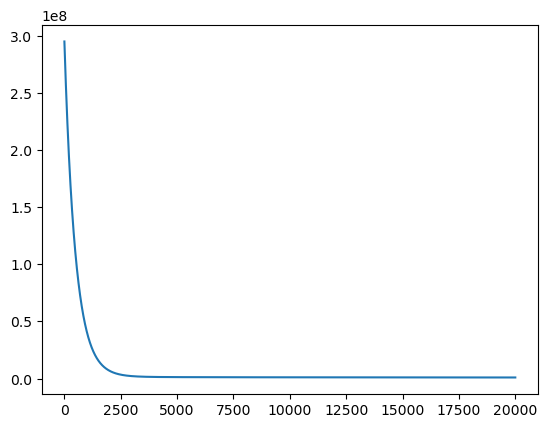

In [37]:
plt.plot(J_storage)

## 4. Model Evaluation

In [38]:
pred = predict(df_features_train, beta)

### Prediction on training dataset

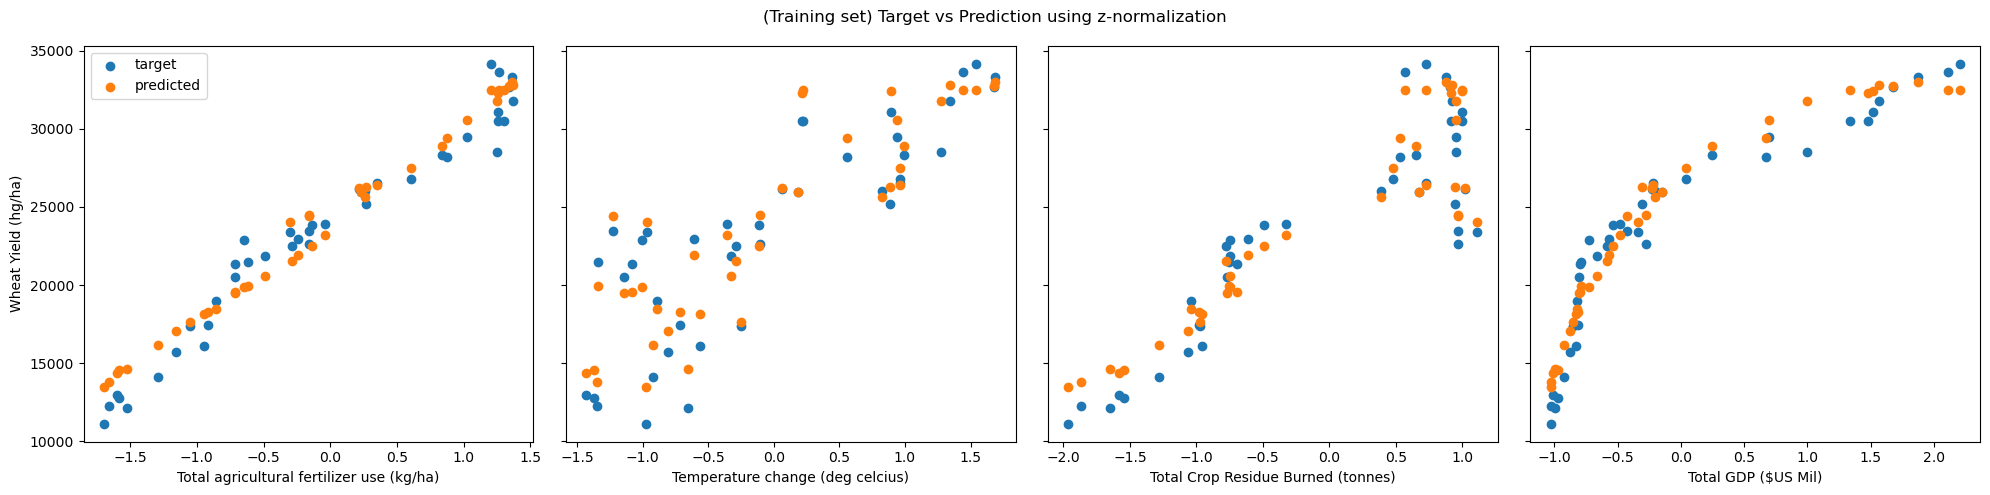

In [39]:
fig1,ax1=plt.subplots(1, df_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax1)):
    ax1[i].scatter(df_features_train.iloc[:,i], df_target_train, label = 'target')
    ax1[i].scatter(df_features_train.iloc[:,i], pred, label= 'predicted')
    ax1[i].set_xlabel(df_cols[i])
ax1[0].set_ylabel("Wheat Yield (hg/ha)")
fig1.suptitle("(Training set) Target vs Prediction using z-normalization")
fig1.tight_layout()
ax1[0].legend()
plt.show()

The beta values from the training set results are:
[[23843.4443070]
 [ 4389.78127632]
 [  -68.92571642]
 [ 1245.32452661]
 [  973.88944555]]
 
1. $\hat{\beta_0}$: 23843.44
2. $\hat{\beta_1}$: 4389.78
3. $\hat{\beta_2}$: -68.92
4. $\hat{\beta_3}$: 1245.32
5. $\hat{\beta_4}$: 973.88

where

$\hat{y}(x) =  \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \hat{\beta}_3 x_3 + \hat{\beta}_4 x_4$

- It can also be said that the respective coefficients: $\hat{\beta_i}$ are the `weights` of the features.
- A higher coefficient means that the respective feature has a heavier weightage in the model.
- The feature with the highest coefficient can also be said to be the feature of the `highest` priority in the model.


### Evaluation of data
- Note that Features were normalized. Hence, we are unable to relate features to its original units.

1. The coefficient $\hat{\beta_0}$ is not affected by any of the features. it is also known as the bias.

2. Since $\hat{\beta_1}$ = 4389.78,<br>
     For feature: Total agricultural fertilizer use - every unit increase of fertilizer use is related to an `increase` in wheat yield by 4389.78 hg/ha.

3. $\hat{\beta_2}$ = -68.92,<br>
     For feature: Temperature change - every unit increase in temperature is related to a `decrease` in wheat yield by 68.92 hg/ha.

4. $\hat{\beta_3}$ = 1245.32,<br>
     For feature: Total crop residue burned - every unit increase of crop residue burned is related to an `increase` in wheat yield by 1245.32 hg/ha.
     
5. $\hat{\beta_4}$ = 973.88,<br>
     For feature: Total GDP - every unit increase in GDP is related to an `increase` in wheat yield by 973.88 hg/ha.

- From this, it can be seen that `Total agricultural fertilizer use` is the most significant factor in positively increasing wheat yield.

### Evaluation Metrics
1. $ R^2_{adjusted}$

2. $ RMSE $

### $$ R^2_{adjusted} = 1 - \frac{(1 - R^2)(m - 1)}{m - p - 1} $$
where:<br><br>
    $R^2$ = R-squared<br>
    m = number of rows in dataset<br>
    p = number of features

- $R^2_{adjusted}$ is used in multiple linear regression instead of regular $R^2$ as $R^2_{adjusted}$ takes into account the number of features in the dataset and scales it down accordingly. 

- The $R^2_{adjusted}$ increases when the new feature improves the model more than would be expected by chance. It decreases when a feature improves the model by less than expected.

- $R^2_{adjusted}$ can only be equal or lower than regular $R^2$

- An interpretation of $R^2_{adjusted}$ is how well the regression model explains predicted data.

Source: https://www.investopedia.com/ask/answers/012615/whats-difference-between-rsquared-and-adjusted-rsquared.asp#:~:text=Adjusted%20R%2Dsquared%20is%20a,model%20by%20less%20than%20expected.

### Root Mean Squared Error:
$$ MSE = \frac{1}{n}\Sigma_{i=1}^m(y^i - \hat{y}^i)^2 $$
$$ RMSE = \sqrt{MSE} $$

where:

$y^i$ = actual y-values<br>
$\hat{y}^i$ = predicted y values<br>
m = number of rows in dataset

- RMSE is a measure of how close the predicted values are to the actual ones. 
- The lower the RMSE, the better the model is.

Source: https://stephenallwright.com/interpret-rmse/

### Calculating $R^2_{adjusted}$ and RMSE for training data

In [40]:
# Regular R^2
def r2_score(y, ypred):
    ss_res = 0
    ss_tot = 0
    y_bar = y.mean()
    for i in range(len(y)):
        ss_res += (y[i] - ypred[i])**2
        ss_tot += (y[i] - y_bar)**2
    r_2 = 1 - (ss_res / ss_tot)
    return r_2

#Adjusted R^2
def adj_r2(r2_score, m, p):
    adj_r2 = 1 - ((1 - r2_score)*( m - 1) / ( m - p - 1))
    return adj_r2

# RMSE
def root_mean_squared_error(target, pred):
    mse = 0
    for i in range(len(target)):
        mse += (target[i] - pred[i])**2
    mse = mse / len(target)
    rmse = math.sqrt(mse)
    return rmse

# Calculate Adjusted R^2 and RMSE
target = prepare_target(df_target_train)
r2 = r2_score(target, pred)
m = len(target)
p = beta.shape[0] -1
adjusted_r2 = adj_r2(r2, m, p)
rmse = root_mean_squared_error(target, pred)
print(f'Regular R^2: {r2}\nAdjusted R^2: {adjusted_r2}\nRMSE: {rmse}')


Regular R^2: [0.94965202]
Adjusted R^2: [0.9440578]
RMSE: 1454.721792021076


- Pretty good $R^2_{adjusted}$ score at 0.944. However, it is to be noted that our independent variables are still collinear with one another, which could lead to a higher $R^2_{adjusted}$ score.
- Hence, we will check our $R^2_{adjusted}$ score with the test set data later.
- RMSE is at 1454 (hg/ha) which is good since the mean wheat yield is about 23745 (hg/ha).

### Representation of prediction vs actual on Training dataset

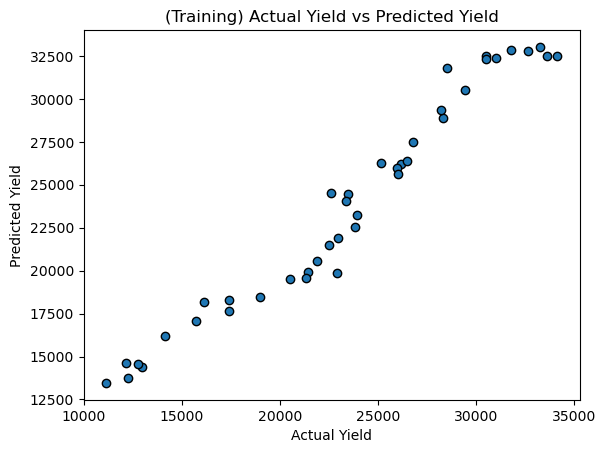

In [41]:
fig3, ax2 = plt.subplots() 

ax2.scatter(df_target_train, pred,edgecolors=(0, 0, 0))

ax2.set_xlabel('Actual Yield')
ax2.set_ylabel('Predicted Yield')
ax2.set_title("(Training) Actual Yield vs Predicted Yield")
plt.show()

The linear relationship looks good!

### Cross validate with testing dataset
To test the validity of our trained model, we will try to predict wheat yield in the test set. If $R^2_{adjusted}$ drops significantly in the test data, we can say that our model was not fitted properly.

In [42]:
test_pred = predict(df_features_test, beta)

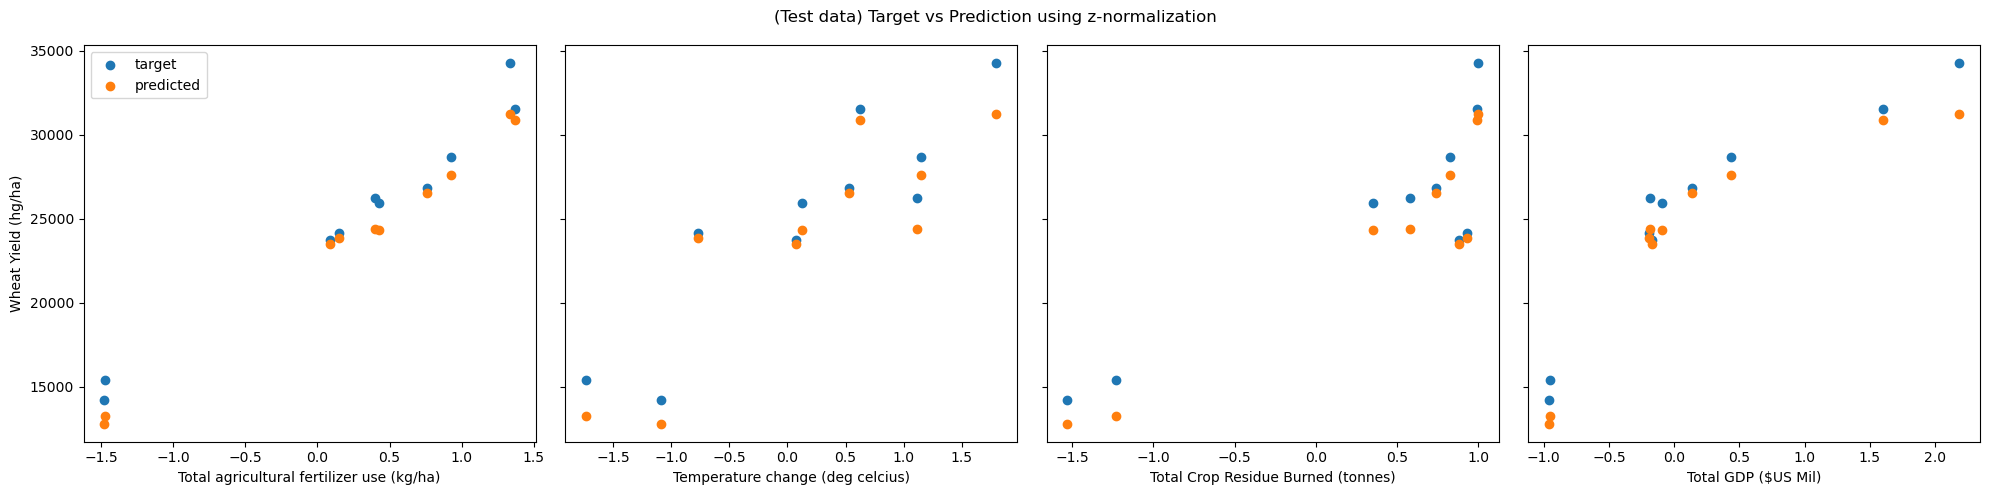

In [43]:
fig2,ax2=plt.subplots(1, df_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax2)):
    ax2[i].scatter(df_features_test.iloc[:,i], df_target_test, label = 'target')
    ax2[i].scatter(df_features_test.iloc[:,i], test_pred, label= 'predicted')
    ax2[i].set_xlabel(df_cols[i])
ax2[0].set_ylabel("Wheat Yield (hg/ha)")
fig2.suptitle("(Test data) Target vs Prediction using z-normalization")
fig2.tight_layout()
ax2[0].legend()
plt.show()

### Running actual yield vs predicted yield on test model 

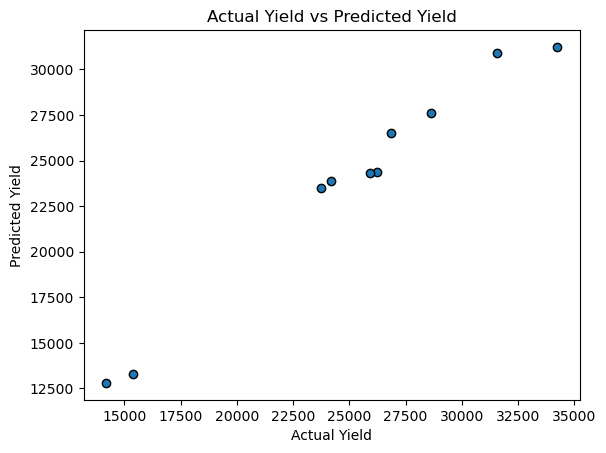

In [44]:
fig3, ax3 = plt.subplots() 

ax3.scatter(df_target_test, test_pred,edgecolors=(0, 0, 0))

ax3.set_xlabel('Actual Yield')
ax3.set_ylabel('Predicted Yield')
ax3.set_title("Actual Yield vs Predicted Yield")
plt.show()

### Evaluation on prediction
- We will once again use $R^2_{adjusted}$ and RMSE to evaluate the predictions.

In [45]:
# Calculate Adjusted R^2 and RMSE
target_test = prepare_target(df_target_test)
test_r2 = r2_score(target_test, test_pred)
m = len(target_test)
p = beta.shape[0] -1
adjusted_r2 = adj_r2(test_r2, m, p)
rmse = root_mean_squared_error(target_test, test_pred)
print(f'Regular R^2: {test_r2}\nAdjusted R^2: {adjusted_r2}\nRMSE: {rmse}')

Regular R^2: [0.93558059]
Adjusted R^2: [0.88404506]
RMSE: 1520.151356308186


## 5. Discussion of the result

`Training Results:`

Regular R^2: [0.94965202]<br>
Adjusted R^2: [0.9440578]<br>
RMSE: 1454.721792021076<br>

`Test Results:`

Regular R^2: [0.93558059]<br>
Adjusted R^2: [0.88404506]<br>
RMSE: 1520.151356308186

1. Test results are not too bad. The $R^2_{adjusted}$ for test is around 0.06 lower than that of the training $R^2_{adjusted}$ which is to be expected. 
2. There is only a slight increase in RMSE of about 70 between training and test RMSE which is negligible.
3. Hence, our model does seem valid.
4. However, these metric might not be very accurate since our dataset has only 50 entries. Furthermore, around 40 entries were used to train and only 10 were used to test.
5. It is possible that our model is overfitted to the data due to the limited amount of data entries and collinear relationship between independent variables.
6. To reduce overfitting, a random sample should be drawn from a large enough dataset. However FAO only has data spanning from 1960-2020 which greatly restricted our size of data.
7. Overall, we still believe that the model is useful in determining the `heaviest` weightage feature through the highest beta cofficient value.

**Hence, our model has shown that countries should first prioritise increasing the amount of fertilizer used to increase the yield of wheat.**


## 6. Discussion of code and improvement to accuracy of the model.
1. Looking back at the scatterplots of the training set, we should be able to improve the model by applying some polynomial functions to certain features.
2. We can apply sqrt to `Total GDP`
3. We can decrease the alpha learning rate, which will provide us with a more accurate gradient descent. However, we will have to increase the number of iterations as well.


In [46]:
#Drop column with lowest correlation with dependent variable
df_imp = df_model.copy()
df_imp.head(3)


,Wheat Yield(hg/ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,25.70,0.074,27579582.0,510164.080943
1,12257,27.62,-0.122,27987415.6,560963.544836
2,12962,30.81,-0.166,29254086.0,679053.093204


`Apply Square root to Total GDP`

In [47]:
# Apply sqrt to Total GDP Feature
df_imp['Total GDP ($US Mil)'] = df_imp['Total GDP ($US Mil)'].apply(lambda x: math.sqrt(x))
df_imp.head(3)

,Wheat Yield(hg/ha),Total agricultural fertilizer use (kg/ha),Temperature change (deg celcius),Total Crop Residue Burned (tonnes),Total GDP ($US Mil)
0,11129,25.70,0.074,27579582.0,714.257713
1,12257,27.62,-0.122,27987415.6,748.974996
2,12962,30.81,-0.166,29254086.0,824.046779


In [48]:
imp_target = "Wheat Yield(hg/ha)"
imp_cols = df_imp.columns[1:]
#Get features and target
imp_features, imp_target = get_features_targets(df_imp, imp_cols, imp_target)

#Normalize Features
imp_features = normalize_z(imp_features)
# Split training:testing 80:



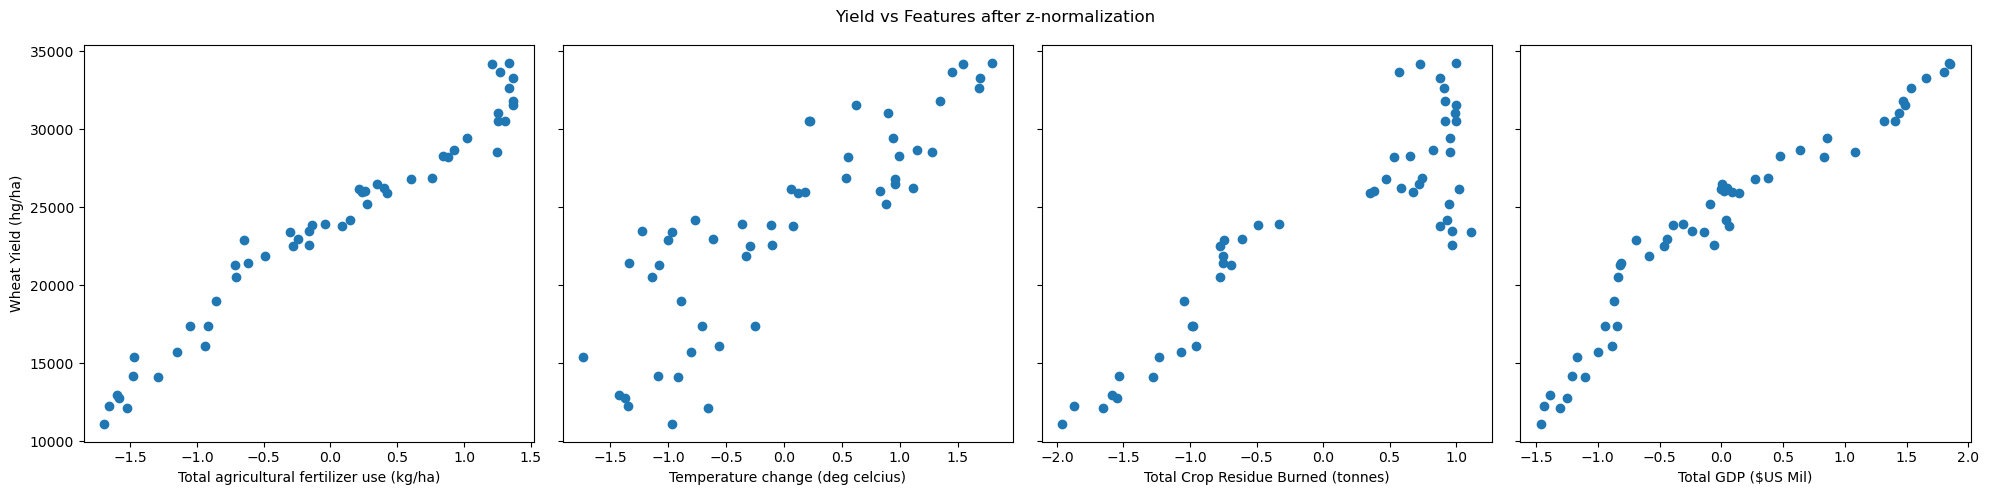

In [49]:
fig5,ax5=plt.subplots(1, imp_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax5)):
    imp_feat = imp_features.iloc[:,i]
    ax5[i].scatter(imp_feat, imp_target)
    ax5[i].set_xlabel(df_cols[i])
ax5[0].set_ylabel("Wheat Yield (hg/ha)")
fig5.suptitle("Yield vs Features after z-normalization")
fig5.tight_layout()
plt.show()

In [50]:
#Split data
imp_features_train, imp_features_test, imp_target_train, imp_target_test = split_data(imp_features, imp_target, 100, 0.2)
X = prepare_feature(imp_features_train)
target = prepare_target(imp_target_train)
# Increase iterations from 20,000 to 60,000
iterations = 60000
# Decrease alpha from 0.01 to 0.001
alpha = 0.0001

beta = np.zeros((X.shape[1],1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(f'beta:{beta}')

/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:44: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_train = df_feature.loc[train_index,:]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:45: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_feature_test = df_feature.loc[test_index, :]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:46: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_train = df_target.loc[train_index, :]
/var/folders/c4/t_dbwf5s3196x2mgvyc3qvhc0000gn/T/ipykernel_8628/2791454537.py:47: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_target_test = df_target.loc[test_index, :]


beta:[[23772.44314115]
 [ 2597.4701208 ]
 [  578.92392361]
 [ 1234.07899557]
 [ 2139.69862382]]


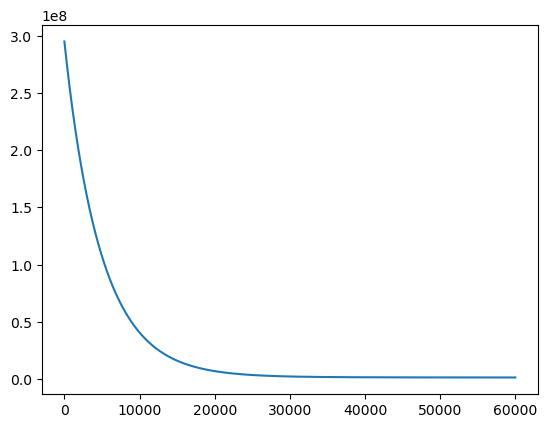

In [51]:
plt.plot(J_storage)

### Predict for training data

In [52]:
train_pred = predict(imp_features_train,beta)

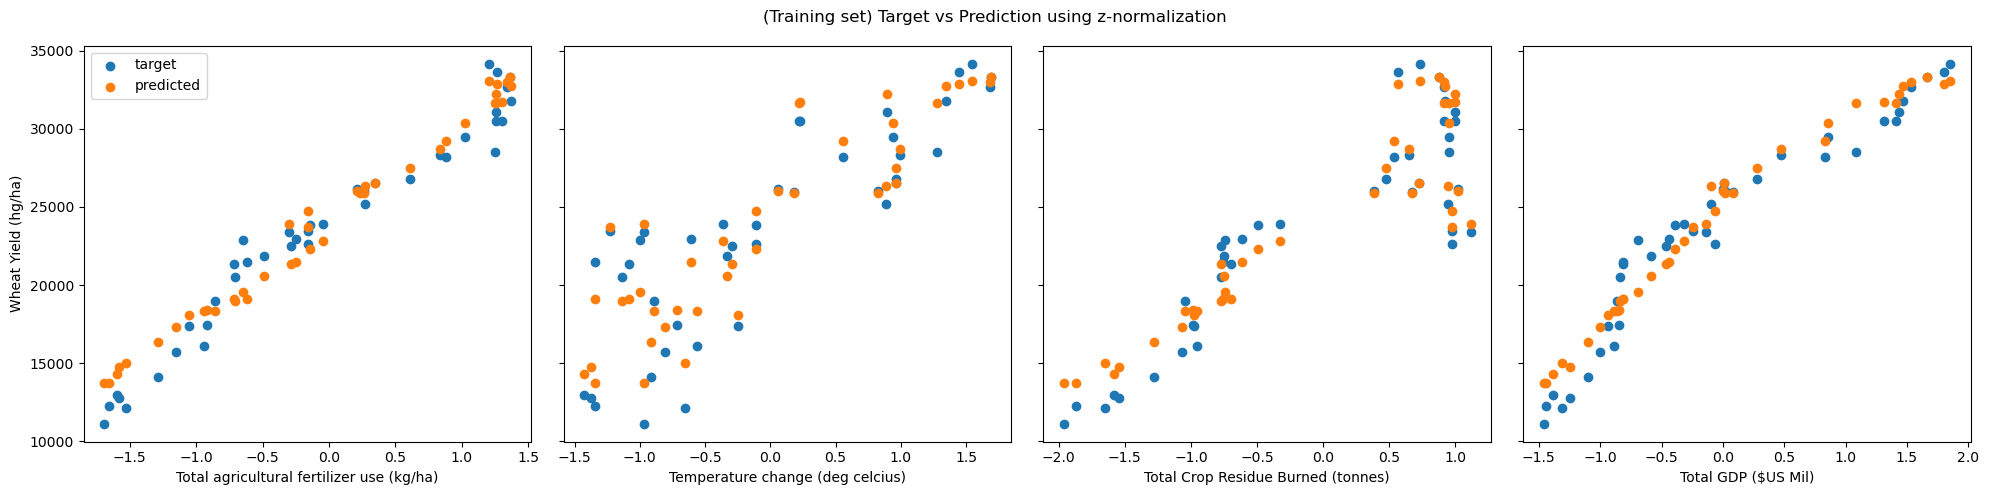

In [53]:
fig6,ax6=plt.subplots(1, imp_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax6)):
    ax6[i].scatter(imp_features_train.iloc[:,i], imp_target_train, label = 'target')
    ax6[i].scatter(imp_features_train.iloc[:,i], train_pred, label= 'predicted')
    ax6[i].set_xlabel(df_cols[i])
ax6[0].set_ylabel("Wheat Yield (hg/ha)")
fig6.suptitle("(Training set) Target vs Prediction using z-normalization")
fig6.tight_layout()
ax6[0].legend()
plt.show()

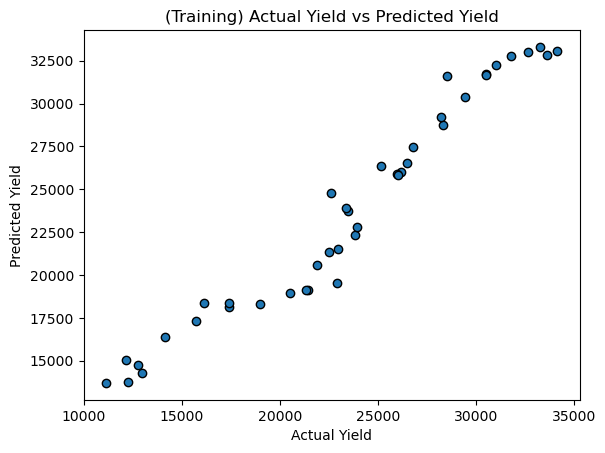

In [54]:
fig8, ax8 = plt.subplots() 

ax8.scatter(imp_target_train, train_pred,edgecolors=(0, 0, 0))

ax8.set_xlabel('Actual Yield')
ax8.set_ylabel('Predicted Yield')
ax8.set_title("(Training) Actual Yield vs Predicted Yield")
plt.show()

### Predict for test data

In [55]:
imp_pred = predict(imp_features_test,beta)

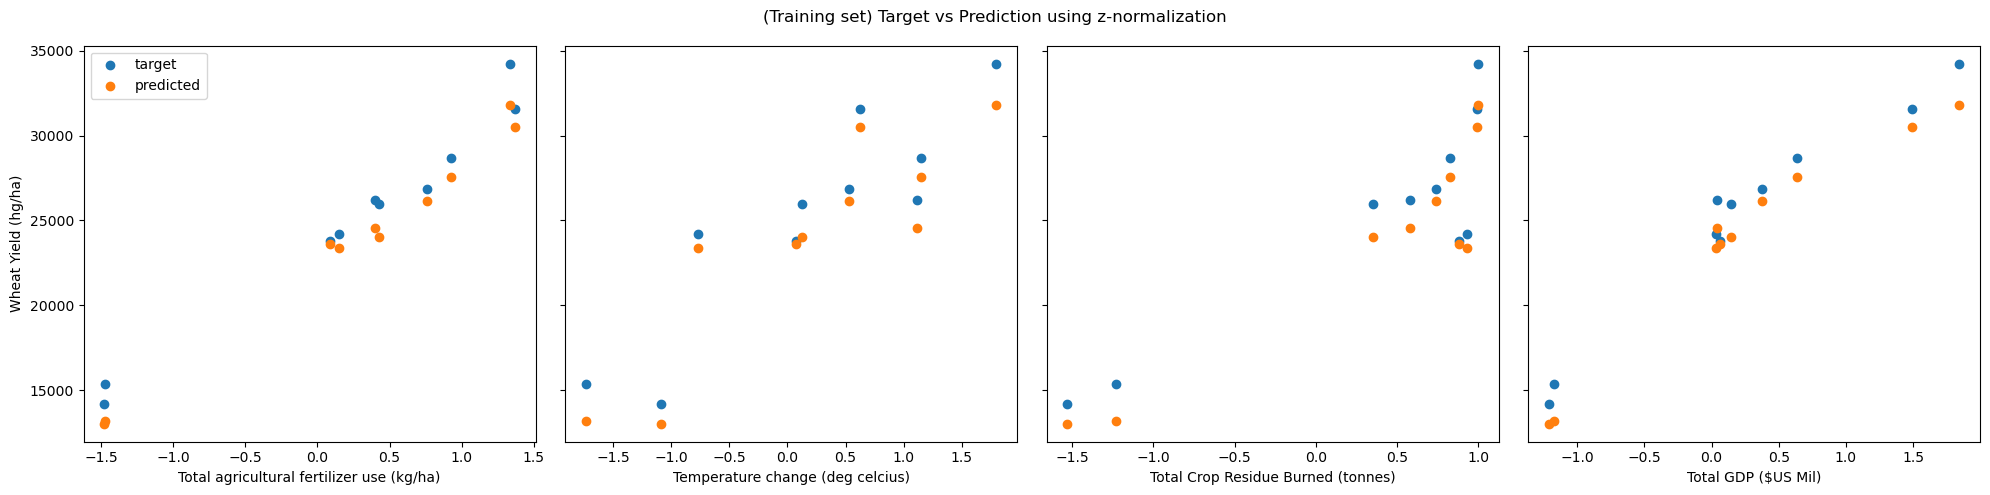

In [56]:
fig7,ax7=plt.subplots(1, imp_features.shape[1], figsize=(20, 5), sharey=True)
for i in range(len(ax7)):
    ax7[i].scatter(imp_features_test.iloc[:,i], imp_target_test, label = 'target')
    ax7[i].scatter(imp_features_test.iloc[:,i], imp_pred, label= 'predicted')
    ax7[i].set_xlabel(df_cols[i])
ax7[0].set_ylabel("Wheat Yield (hg/ha)")
fig7.suptitle("(Training set) Target vs Prediction using z-normalization")
fig7.tight_layout()
ax7[0].legend()
plt.show()

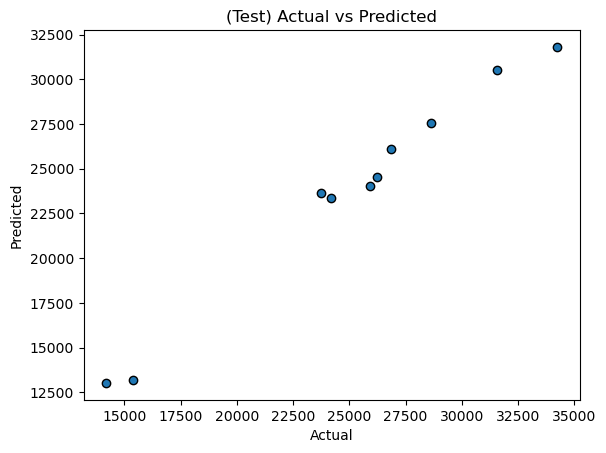

In [57]:
fig4, ax4 = plt.subplots() 

ax4.scatter(imp_target_test, imp_pred,edgecolors=(0, 0, 0))

ax4.set_xlabel('Actual')
ax4.set_ylabel('Predicted')
ax4.set_title("(Test) Actual vs Predicted")
plt.show()

### Calculate test data metrics after improvement

In [58]:
# Calculate Adjusted R^2 and RMSE
imp_target_test = prepare_target(imp_target_test)
test_r2 = r2_score(imp_target_test, imp_pred)
m = len(imp_target_test)
p = beta.shape[0] -1
adjusted_r2 = adj_r2(test_r2, m, p)
rmse = root_mean_squared_error(imp_target_test, imp_pred)
print(f'Regular R^2: {test_r2}\nAdjusted R^2: {adjusted_r2}\nRMSE: {rmse}')

Regular R^2: [0.93811344]
Adjusted R^2: [0.8886042]
RMSE: 1489.9668704441685


## Analysis of improvements

Before Improvement:

beta values:
[[23843.44430706]
 [ 4389.78127632]
 [  -68.92571642]
 [ 1245.32452661]
 [  973.88944555]]

1. $\hat{\beta_0}$: 23843.44
2. $\hat{\beta_1}$: 4389.78
3. $\hat{\beta_2}$: -68.92
4. $\hat{\beta_3}$: 1245.32
5. $\hat{\beta_4}$: 973.88

`Test` data metric values:

Regular R^2: [0.93558059]<br>
Adjusted R^2: [0.88404506]<br>
RMSE: 1520.151356308186

After Improvement:

beta:
[[23772.44314115]
 [ 2597.4701208 ]
 [  578.92392361]
 [ 1234.07899557]
 [ 2139.69862382]]

 1. $\hat{\beta_0}$: 23772.44
2. $\hat{\beta_1}$: 2597.47
3. $\hat{\beta_2}$: 578.92
4. $\hat{\beta_3}$: 1234.07
5. $\hat{\beta_4}$: 2139.69

`Test` data metric values:

Regular R^2: [0.93811344]<br>
Adjusted R^2: [0.8886042]<br>
RMSE: 1489.9668704441685
 

1. It seems like our priority of features has not changed after our improvements! This shows that our first model's results were accurate, that `Fertilizer use` was the most important factor in affecting wheat yield!
2. However, it seems that `Total GDP` is now the second highest priority, whereas it was Total crop residue burned before the model's improvement.
3. Moving on to our evaluation metrics, our $R^2_{adjusted}$ has increased by 0.002 after improvement! It is tough to gain a significant improvement when our $R^2_{adjusted}$ was already so high to begin with.
4. RMSE has also decreased after improvement, by ~30. This is not a significant decrease but still a slight improvement!

### Conclusion

All in all, our group believes that with more data, our group would have been able to craft a more accurate model in predicting the most important factor which affects wheat yield. However, we worked with what we had and came up with a model which could tackle our problem statement! It seems that countries should put in efforts in increasing fertilizer use, then GDP to increase their yield for wheat.